In [457]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler


# Models ML
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss, roc_curve, auc, mean_squared_error

# Model RNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load Dataset

In [458]:
df = pd.read_csv('../dataset/Financial_ Application_ Behavior_ Dataset.csv')
df.head(10)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0
6,144649,2012-12-25 02:33:18.461,1,02:00:00,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaN,0
7,249366,2012-12-11 03:07:49.875,1,03:00:00,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaN,0
8,372004,2013-03-20 14:22:01.569,2,14:00:00,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,2013-04-27 22:24:54.542,0
9,338013,2013-04-26 18:22:16.013,4,18:00:00,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,2013-04-26 18:31:58.923,0


In [459]:
df.shape

(50000, 12)

In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [461]:
df.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [462]:
print(len(df['screen_list'].unique()))

38799


<Axes: xlabel='age', ylabel='Count'>

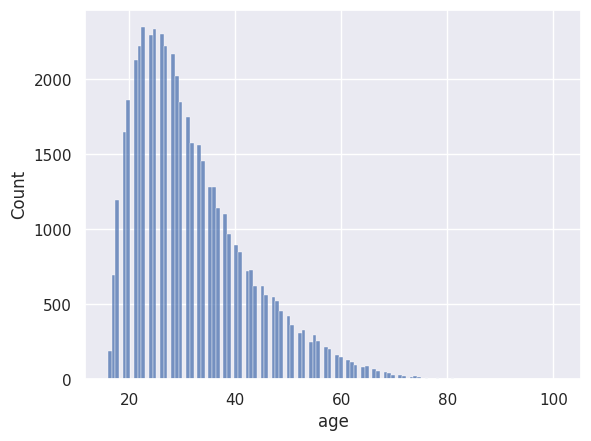

In [463]:
sns.histplot(df['age'])

<Axes: xlabel='dayofweek', ylabel='Count'>

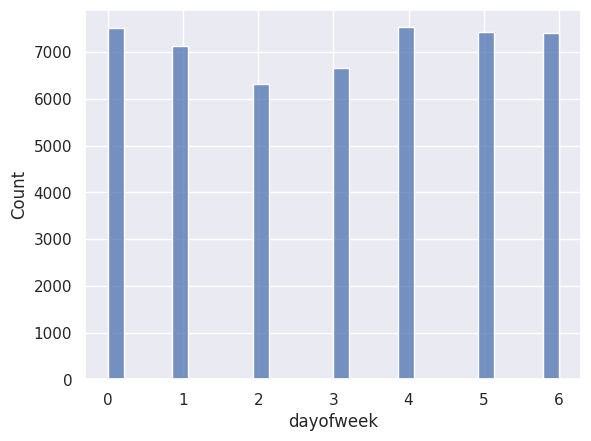

In [464]:
sns.histplot(df['dayofweek'])

<Axes: xlabel='numscreens', ylabel='Count'>

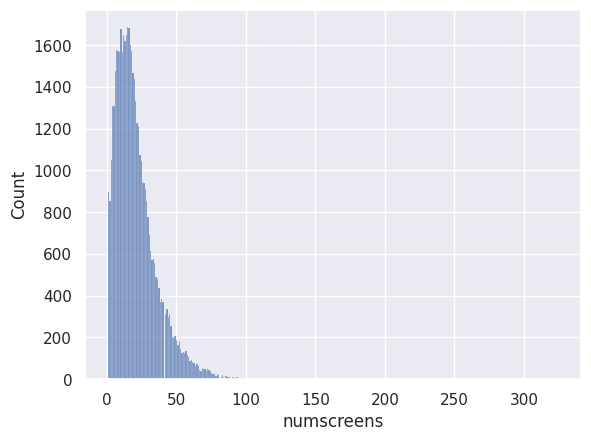

In [465]:
sns.histplot(df['numscreens'])

In [466]:
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [467]:
df['hour'] = df.hour.str.slice(1, 3).astype(int)
df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [468]:
# make a new dataset
finetech_data = df.drop(['user', 'first_open', 'screen_list', 'enrolled_date'], axis=1)
finetech_data.head(6)

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1
5,2,9,20,14,0,0,1,0


In [469]:
finetech_data.shape

(50000, 8)

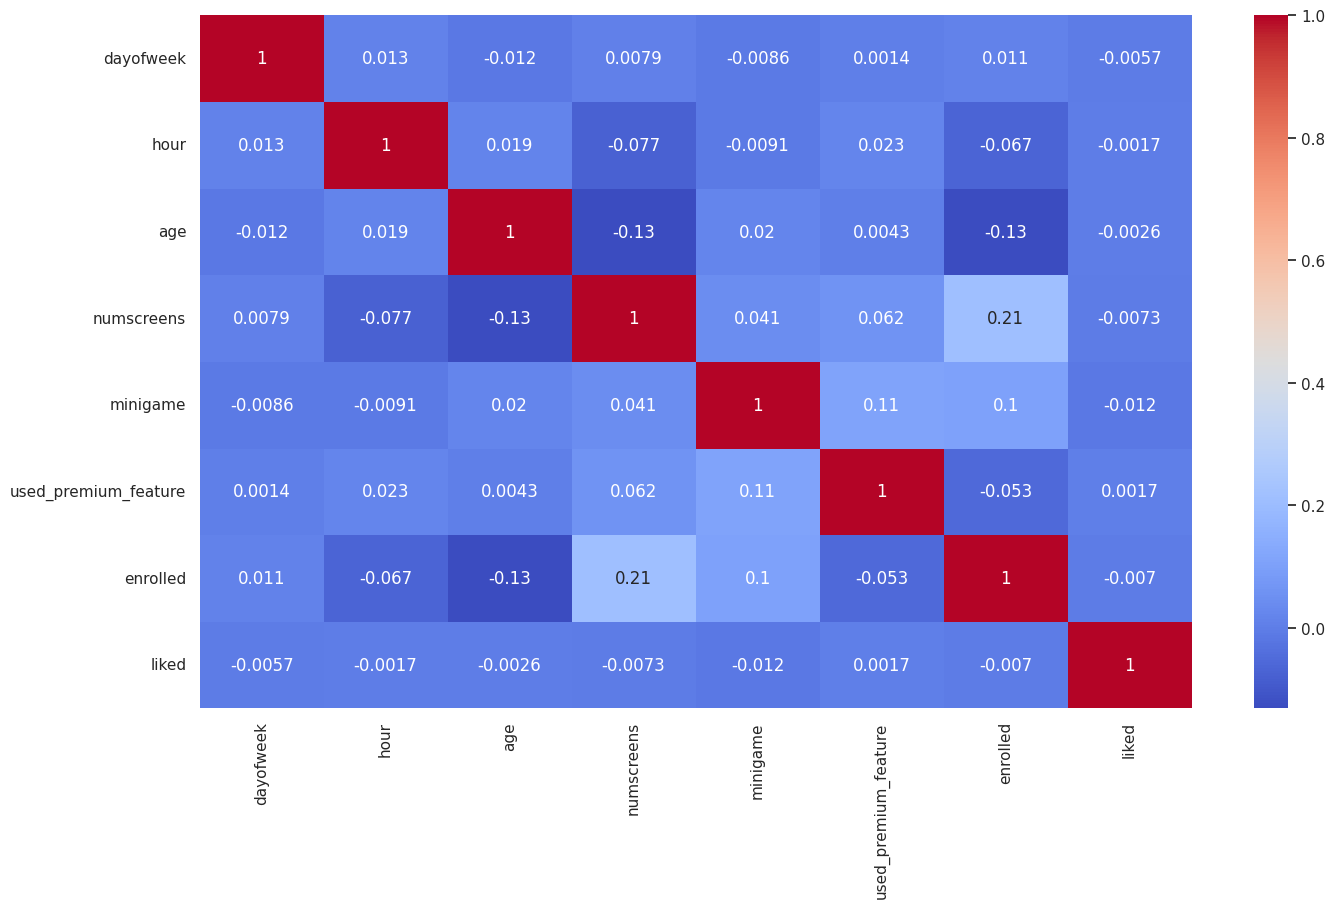

In [470]:
plt.figure(figsize=(16,9))
sns.heatmap(finetech_data.corr(), annot = True, cmap = 'coolwarm')
plt.show()

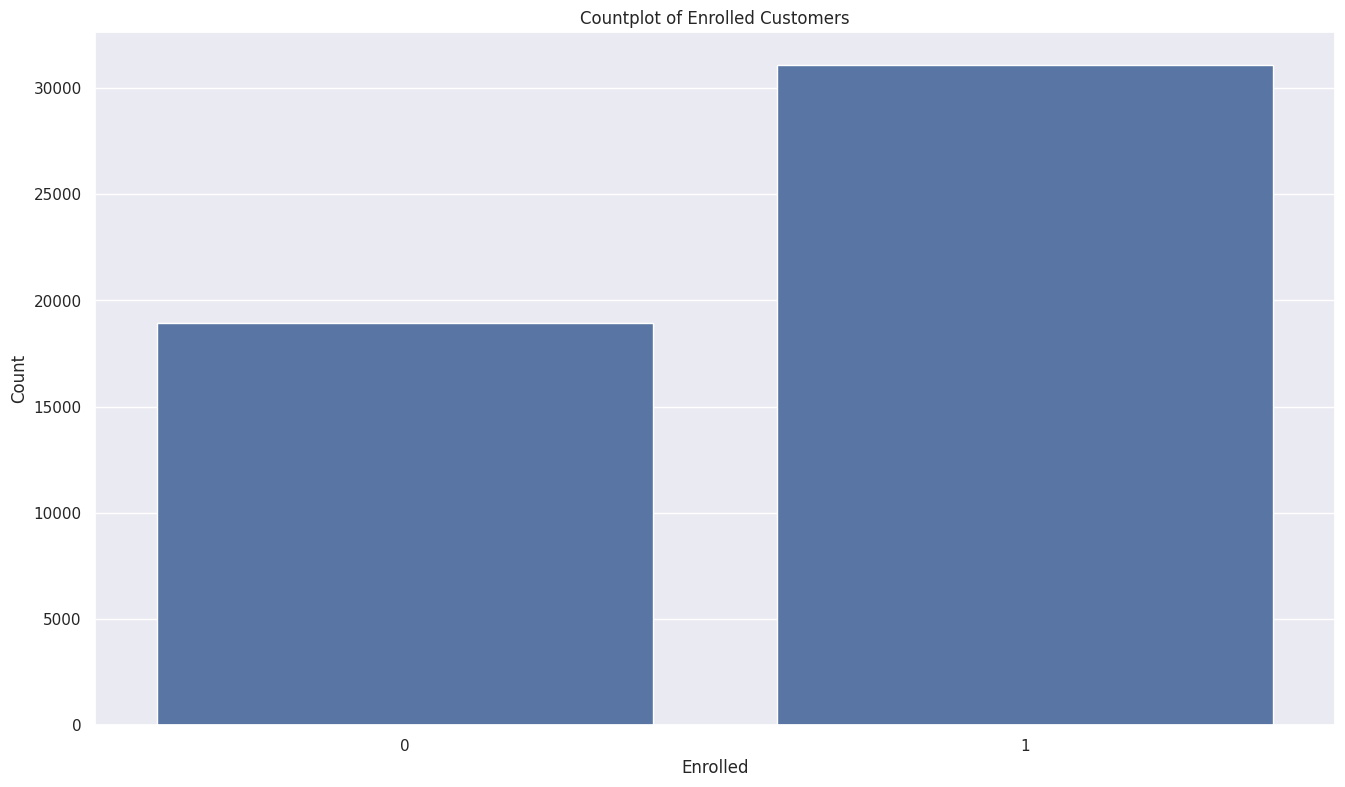

In [471]:
plt.figure(figsize=(16,9))
sns.countplot(x='enrolled', data=df)

plt.xlabel("Enrolled")
plt.ylabel('Count')
plt.title('Countplot of Enrolled Customers')
plt.show()

In [472]:
# Checking how many user
print("Not Enrolled : ", (df.enrolled < 1).sum())
print("Enrolled : ", 50000 - (df.enrolled < 1).sum())

Not Enrolled :  18926
Enrolled :  31074


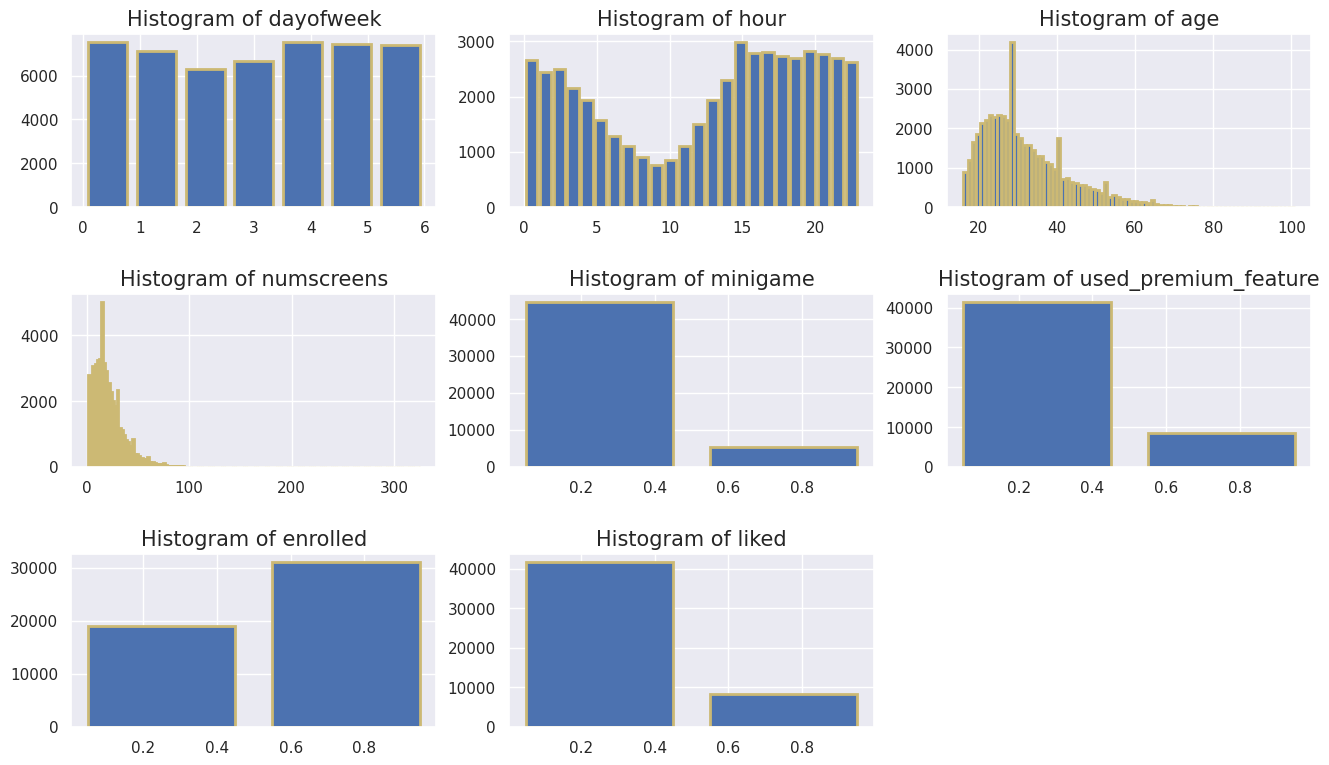

In [473]:
plt.figure(figsize=(16, 9))
features = finetech_data.columns

for i, j in enumerate(features):
    plt.subplot(3, 3, i+1)
    plt.title("Histogram of {}".format(j), fontsize = 15)

    bins = len(finetech_data[j].unique())
    plt.hist(finetech_data[j], bins=bins, rwidth=0.8, edgecolor="y", linewidth=2, )

plt.subplots_adjust(hspace=0.5)

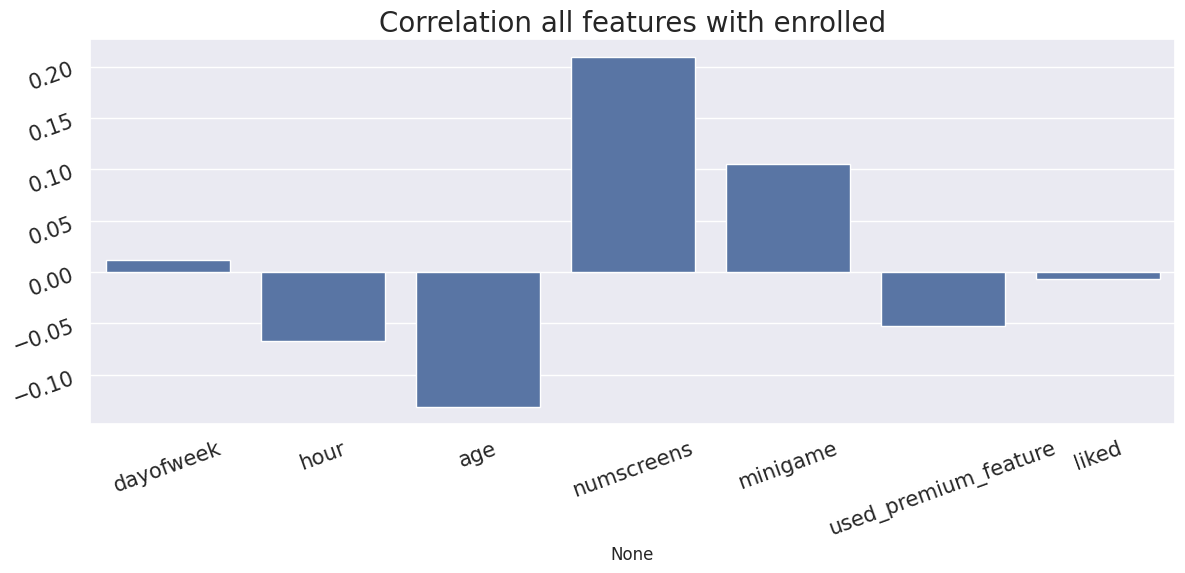

In [474]:
# Finding correlation between features and target
sns.set() # Set bg
plt.figure(figsize=(14,5))
plt.title('Correlation all features with enrolled', fontsize=20)
finetech_data2 = finetech_data.drop(['enrolled'], axis=1)

# Calculate the correlation
correlations = finetech_data2.corrwith(finetech_data['enrolled'])

# Create the barplot
ax = sns.barplot(x=correlations.index, y=correlations.values)

ax.tick_params(labelsize=15, labelrotation=20, color='k')

plt.show()

Text(0.5, 1.0, 'Enrolled Distribution')

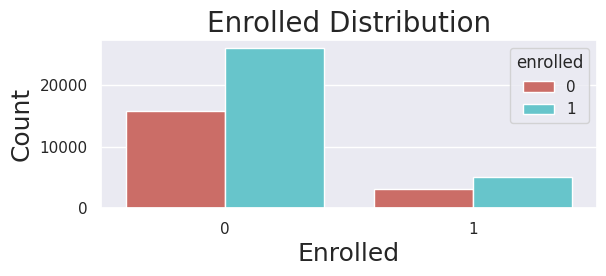

In [475]:
plt.subplot(2, 1, 1)
sns.countplot(data = finetech_data, x="liked", hue='enrolled', palette="hls")
plt.ylabel("Count", fontsize=18)
plt.xlabel("Enrolled", fontsize=18)
plt.title("Enrolled Distribution", fontsize=20)

In [476]:
# Make interval for 'Age'
interval = [12, 18, 25, 35, 60, 120]
categories = ['Teen', 'Student', 'Young', 'Adult', 'Senior']

finetech_data['age_user'] = pd.cut(finetech_data['age'], bins=interval, labels=categories)

# Showing output
print(finetech_data['age_user'].head())

0    Student
1    Student
2    Student
3      Young
4      Young
Name: age_user, dtype: category
Categories (5, object): ['Teen' < 'Student' < 'Young' < 'Adult' < 'Senior']


Text(0.5, 1.0, 'Age Distribution')

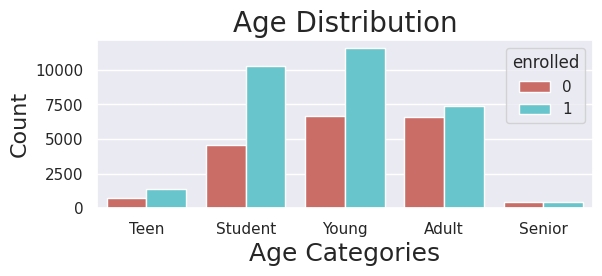

In [477]:
plt.subplot(2, 1 , 1)
sns.countplot(data = finetech_data, x='age_user', hue='enrolled', palette='hls')
plt.xlabel('Age Categories', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.title('Age Distribution', fontsize=20)

Text(0.5, 1.0, 'Minigame Distribution')

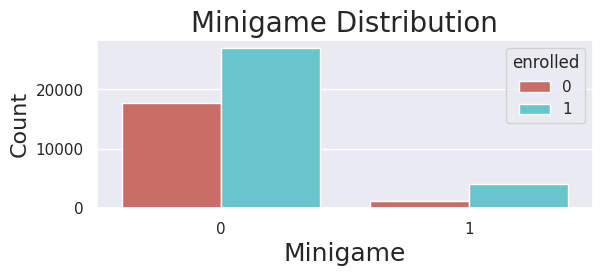

In [478]:
plt.subplot(2, 1 , 1)
sns.countplot(data = finetech_data, x='minigame', hue='enrolled', palette='hls')
plt.xlabel('Minigame', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.title('Minigame Distribution', fontsize=20)

Text(0.5, 1.0, 'DoW Distribution')

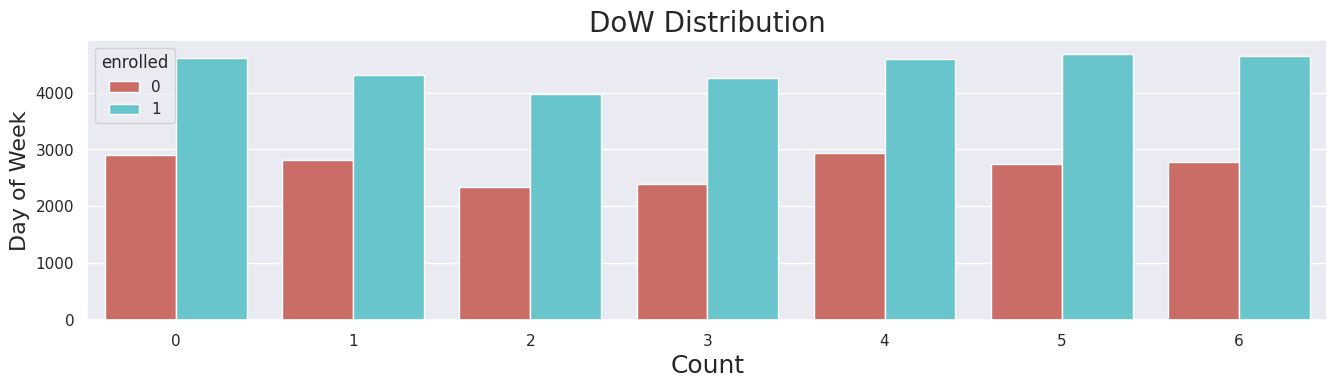

In [479]:
plt.figure(figsize=(16, 8))
plt.subplot(2, 1 , 1)
sns.countplot(data = finetech_data, x='dayofweek', hue='enrolled', palette='hls')
plt.xlabel('Count', fontsize=18)
plt.ylabel('Day of Week', fontsize=16)
plt.title('DoW Distribution', fontsize=20)

Text(0.5, 1.0, 'Hour Distribution')

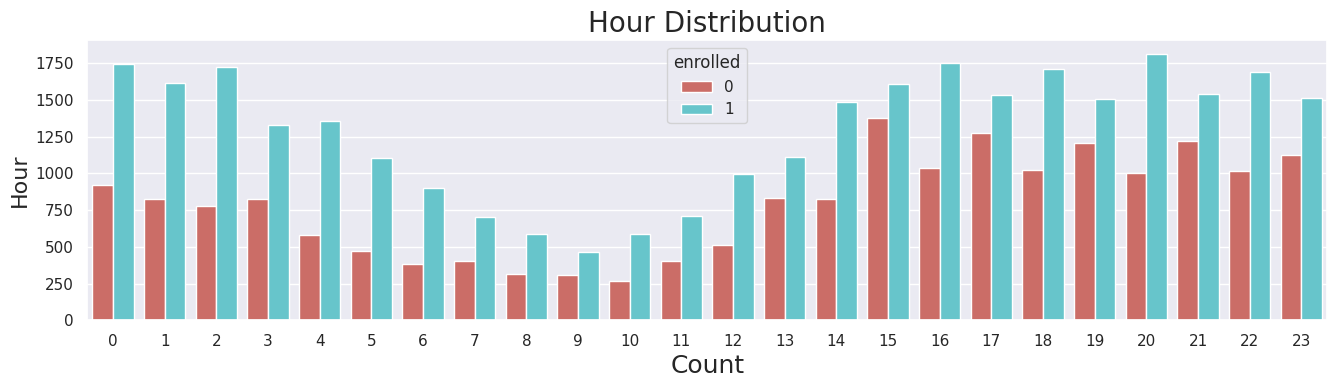

In [480]:
plt.figure(figsize=(16, 8))
plt.subplot(2, 1 , 1)
sns.countplot(data = finetech_data, x='hour', hue='enrolled', palette='hls')
plt.xlabel('Count', fontsize=18)
plt.ylabel('Hour', fontsize=16)
plt.title('Hour Distribution', fontsize=20)

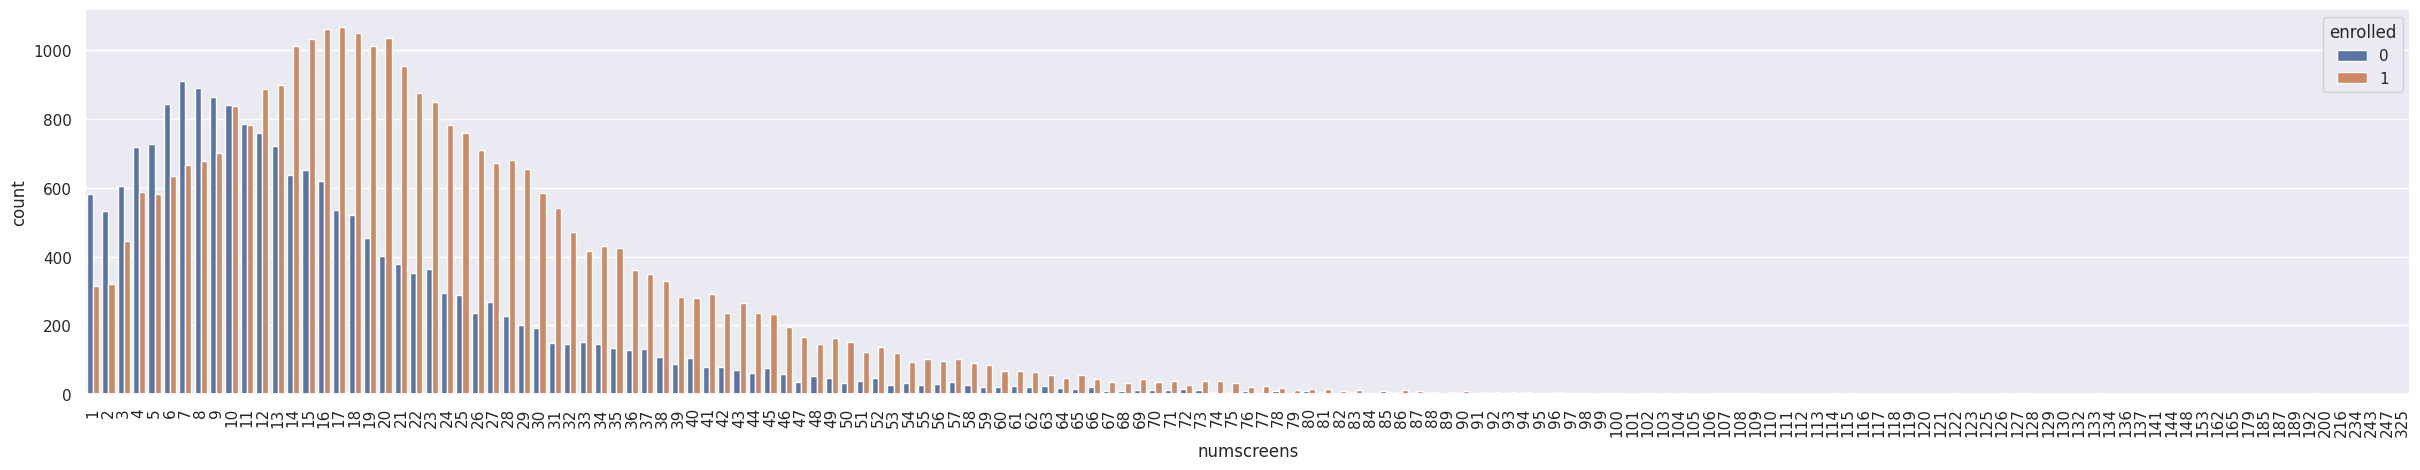

In [481]:
plt.figure(figsize=(30,5))
sns.countplot(x=finetech_data['numscreens'], hue=finetech_data['enrolled'])
plt.xticks(rotation=90)
plt.show()

# Removing outliers

In [482]:
def remove_outliers(data, cols):
    for i in cols: 
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[i] >= lower_bound) & (data[i] <= upper_bound)]
        
    return data

In [483]:
finetech_data = remove_outliers(finetech_data, ['dayofweek', 'age', 'hour','numscreens'])

In [484]:
finetech_data3 = finetech_data.drop(['age_user'], axis=1)
finetech_data3.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1


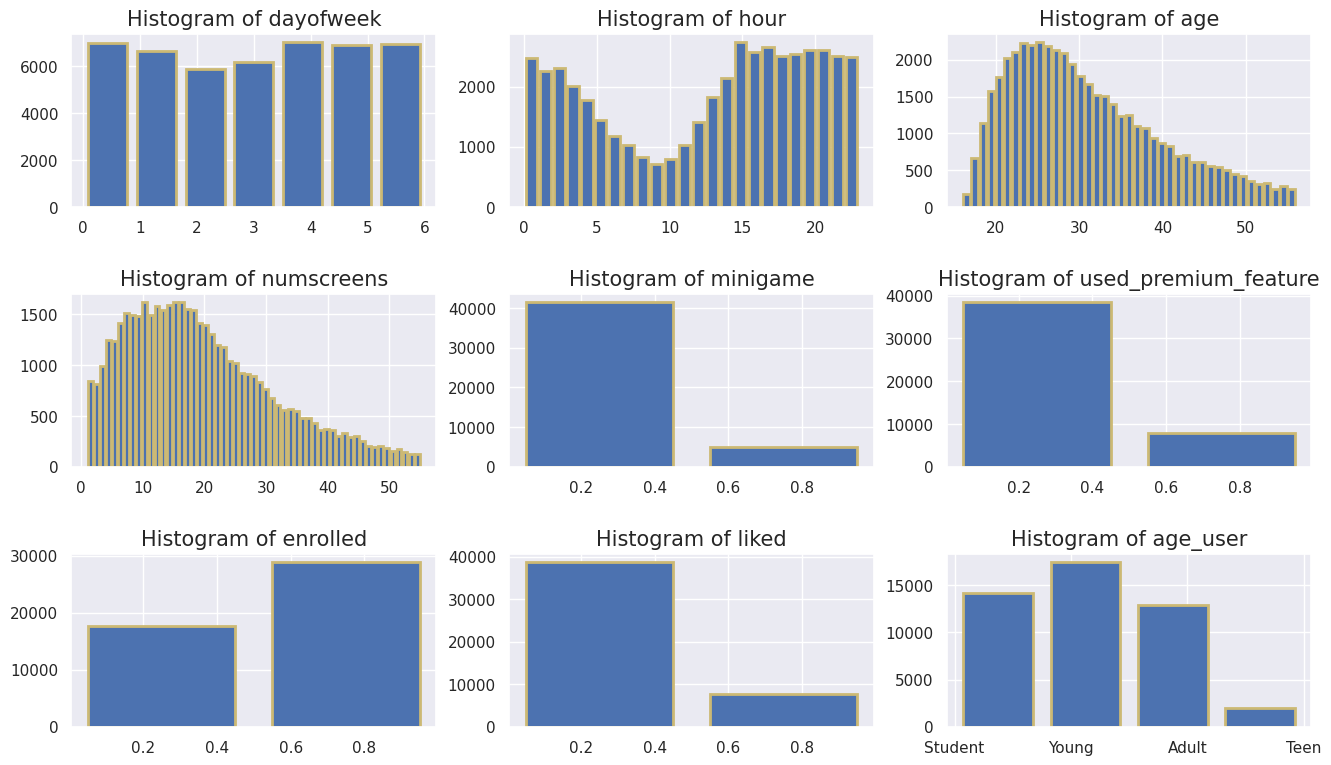

In [485]:
plt.figure(figsize=(16, 9))
features = finetech_data.columns

for i, j in enumerate(features):
    plt.subplot(3, 3, i+1)
    plt.title("Histogram of {}".format(j), fontsize = 15)

    bins = len(finetech_data[j].unique())
    plt.hist(finetech_data[j], bins=bins, rwidth=0.8, edgecolor="y", linewidth=2, )

plt.subplots_adjust(hspace=0.5)

In [486]:
finetech_data3['liked'].value_counts()

liked
0    38824
1     7712
Name: count, dtype: int64

# Menggunakan variabel target/dependent 'liked'

In [487]:
X_1 = finetech_data3.drop("liked", axis=1)
y_1 = finetech_data3['liked']

# Split data berukuran 70:30

In [488]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.30)

# Menggunakan Multinomial Naive Bayes

In [489]:
naive_bayes = MultinomialNB()

# Training
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [490]:
y_pred_bayes = naive_bayes.predict(X_test)

In [491]:
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred_bayes))


print('\nAccuracy:')
print(accuracy_score(y_test, y_pred_bayes))


Confusion Matrix:
[[11710     0]
 [ 2251     0]]

Accuracy:
0.8387651314375761


# Random Forest Classifier

In [492]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [493]:
y_pred_forest = random_forest_model.predict(X_test)

In [494]:
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred_forest))

# Akurasi
print('\nAccuracy:')
print(accuracy_score(y_test, y_pred_forest))


Confusion Matrix:
[[11384   326]
 [ 2185    66]]

Accuracy:
0.8201418236516009


# K-Neighbors Classifier

In [495]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [496]:
y_pred_knn = knn_model.predict(X_test)

In [497]:
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred_knn))

# Akurasi
print('\nAccuracy:')
print(accuracy_score(y_test, y_pred_knn))



Confusion Matrix:
[[11258   452]
 [ 2153    98]]

Accuracy:
0.8134087816059021


# Neural Network menggunakan ANN

* Dengan Input 7
* Ada 2 Layer 
* 1 Layer Output

* model.add(Dropout()), berguna untuk mengurangi overfitting pada dataset

In [498]:
model = Sequential()

# Layer Input
model.add(Dense(128, activation='relu', input_shape=[7]))

# Adding Dropout for avoiding overfitting
model.add(Dropout(0.5))

# Hidden Layer
model.add(Dense(64, activation='relu'))

# Add Dropout
model.add(Dropout(0.5))

# output layer
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
408/408 [==============================] - 1s 1ms/step - loss: 0.7538 - accuracy: 0.7838 - val_loss: 0.4767 - val_accuracy: 0.8282
Epoch 2/100
408/408 [==============================] - 1s 1ms/step - loss: 0.4824 - accuracy: 0.8306 - val_loss: 0.4672 - val_accuracy: 0.8282
Epoch 3/100
408/408 [==============================] - 0s 1ms/step - loss: 0.4724 - accuracy: 0.8326 - val_loss: 0.4665 - val_accuracy: 0.8282
Epoch 4/100
408/408 [==============================] - 0s 1ms/step - loss: 0.4658 - accuracy: 0.8332 - val_loss: 0.4613 - val_accuracy: 0.8282
Epoch 5/100
408/408 [==============================] - 0s 1ms/step - loss: 0.4619 - accuracy: 0.8333 - val_loss: 0.4612 - val_accuracy: 0.8282
Epoch 6/100
408/408 [==============================] - 0s 1ms/step - loss: 0.4592 - accuracy: 0.8334 - val_loss: 0.4606 - val_accuracy: 0.8282
Epoch 7/100
408/408 [==============================] - 0s 1ms/step - loss: 0.4560 - accuracy: 0.8334 - val_loss: 0.4596 - val_accuracy: 0.8282

# Menggunakan variabel target 'used_premium_feature'

In [499]:
X_2 = finetech_data3.drop(['used_premium_feature'], axis=1)
y_2 = finetech_data3['used_premium_feature']

# Split size 75:25

In [500]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, test_size=0.25)

# Logistic Regression

In [501]:
logisticRegression2 = LogisticRegression()
logisticRegression2.fit(X2_train, y2_train)

LogisticRegression()

In [502]:
y2_pred_lr = logisticRegression2.predict(X2_test)
y2_pred_lr_proba = logisticRegression2.predict_proba(X2_test)[:,1]

In [503]:
# ROC Curve
fpr2, tpr2, thr2 = roc_curve(y2_test, y2_pred_lr_proba)

# Akurasi Logistic Regression, Log Loss, dan AUC (Area Under Curve)

In [504]:
print('\nConfusion Matrix:')
print(confusion_matrix(y2_test, y2_pred_lr))

print('\n\nTrain/Test split result')
print(logisticRegression2.__class__.__name__ + " accuracy is %2.3f" % accuracy_score(y2_test, y2_pred_lr))
print(logisticRegression2.__class__.__name__ + " log loss is %2.3f" % log_loss(y2_test, y2_pred_lr_proba))
print(logisticRegression2.__class__.__name__ + " AUC is %2.3f" % auc(fpr2, tpr2))


Confusion Matrix:
[[9667    0]
 [1967    0]]


Train/Test split result
LogisticRegression accuracy is 0.831
LogisticRegression log loss is 0.442
LogisticRegression AUC is 0.617


# Menggunakan RandomForestClassifier dan GridSearchCV sebagai Model Tuning

In [505]:
random_forest_model2 = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest_model2.fit(X2_train, y2_train)

RandomForestClassifier(random_state=0)

In [506]:
# With scaler
params = {
    'criterion' : ['gini', 'entropy', 'log_loss']
}

gr_cv2 = GridSearchCV(estimator=random_forest_model2, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
gr_cv2.fit(X2_train, y2_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss']},
             scoring='accuracy')

In [507]:
# Finding best params and models
best_params = gr_cv2.best_params_
best_model = gr_cv2.best_estimator_
print("Best Hyperparameters : ", best_params)

# Test model
accuracy = best_model.score(X2_test, y2_test)
print("Accuracy : ", accuracy)

Best Hyperparameters :  {'criterion': 'entropy'}
Accuracy :  0.8097816744026131


# Neural Network menggunakan ANN :
* 7 Input
* Menggunakan 6 Hidden Layer
* 1 Layer Output

In [508]:
model2 = Sequential()

# Layer Input
model2.add(Dense(128, activation='relu', input_shape=[7]))

# Adding Dropout for avoiding overfitting
model2.add(Dropout(0.5))

# Hidden Layer
model2.add(Dense(64, activation='relu'))

# Add Dropout
model2.add(Dropout(0.5))

# Hidden Layer
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(8, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(4, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(2, activation='relu'))
# output layer
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model2.fit(X2_train, y2_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
437/437 [==============================] - 2s 2ms/step - loss: 0.6062 - accuracy: 0.8176 - val_loss: 0.4884 - val_accuracy: 0.8204
Epoch 2/100
437/437 [==============================] - 1s 2ms/step - loss: 0.4783 - accuracy: 0.8277 - val_loss: 0.4720 - val_accuracy: 0.8204
Epoch 3/100
437/437 [==============================] - 1s 2ms/step - loss: 0.4624 - accuracy: 0.8284 - val_loss: 0.4707 - val_accuracy: 0.8204
Epoch 4/100
437/437 [==============================] - 1s 2ms/step - loss: 0.4602 - accuracy: 0.8285 - val_loss: 0.4708 - val_accuracy: 0.8204
Epoch 5/100
437/437 [==============================] - 1s 2ms/step - loss: 0.4583 - accuracy: 0.8287 - val_loss: 0.4709 - val_accuracy: 0.8204
Epoch 6/100
437/437 [==============================] - 1s 2ms/step - loss: 0.4587 - accuracy: 0.8287 - val_loss: 0.4710 - val_accuracy: 0.8204
Epoch 7/100
437/437 [==============================] - 1s 2ms/step - loss: 0.4585 - accuracy: 0.8287 - val_loss: 0.4710 - val_accuracy: 0.8204